# Dynamic Agency Model, Multiobjective Stationary Solution

## Packages

In [11]:
using Pkg
using Plots
#using Interact, Convex, SCS, JuMP, ECOS, HDF5,JLD
using DelimitedFiles
using DataFrames
using CSV


## Parameters and Functions

In [12]:
# adding working directory/src/ to load path
push!(LOAD_PATH,"./src/");

In [13]:
### Parameters ###

# loading model
using StationaryMo
smo = StationaryMo


StationaryMo

## Overview of the model



The value function is the Pareto Weight of the multiobjective approach, that is

$$PW(\xi) = \xi U + (1-\xi) V$$

where 

$\xi \in \Xi$ is the bargaining power of the principal and the state variable of the model, 

$U$ is the principal's expected (discounted) utility

$$U(\xi) = \mathbb{E}[y-w_y+ \beta U(\xi,y)],$$

$V$ is the agent's expected (discounted) utility

$$V(\xi) = \mathbb{E}[v(w_y) - a + \beta V(\xi,y)], $$

where $y$ is the observed output, $w_y$ is the compensation given the observed output $y$, $v(w)$ is the crra function, $\beta$ is the discount factor, and $a$ is the effort exerted by the agent.

In addition, $V(\xi,y) = V_y(\xi)$ and $U(\xi,y) = U_y(\xi)$ are the agent and principal future compensation, respectively. Notice, that in the non-stationary version, $V(y_{t-1}, \xi_t)$ depends on $V(y_{t}, \xi_{t+1})$, and the same goes for the principal. However, in the stationary version, every variable is a function of the state variable $\xi$ and $V_y(\xi)$ becomes the stationary future compensation to which a future bargaining power is assigned. In other words, a new bargaining power $\xi_y$ is promised  to the agent and the principal when $y$ is observed given the current bargaining power $\xi$; that is, $V_y(\xi) = V(\xi_y)$ and $U_y(\xi) = U(\xi_y)$. Moreover, because the new bargaining power is chosen once for each $y$, $\xi_y$ is the same for the principal and the agent, although this entails different utilities $V(\xi_y)$ and $U(\xi_y)$.   

Now , let $\mathcal{V(\xi)}$, $\mathcal{U(\xi)}$ and $\mathcal{PW(\xi)}$ be the set of feasible and incentive compatible expected discounted utilities of the agent,  principal and convex combination (Pareto Weight function). Also, let $\mathcal{\Xi}$ be the set of bargaining powers generated by a feasible and incentive compatible contract. Then, we need to prove that $\mathcal{PW(\xi)}$ is compact.

Hence, by means of the Bellman equation $PW^*(\xi) = \{ \max PW(contract, history_{t=0}) \in \mathcal{PW(\xi)}) \} $ the program is 

$$\max_{w_y(\xi),a(\xi), V_y(\xi)}   \xi U(\xi) + (1-\xi) V(\xi) $$

subject to 

\begin{equation}
\tag{Incentive Compatible}
a(\xi) \in argmax_{\text{ } a'} \quad V(\xi, a')
\end{equation}

\begin{equation}
\tag{Feasible Effort}
a(\xi) \in A
\end{equation}

\begin{equation}
\tag{Limited Liability}
0 \leq w_y(\xi) \leq  y \qquad \text{for all } y
\end{equation}

\begin{equation}
\tag{Feasible and Incentive compatible $V_y$ }
V_y(\xi) \in \mathcal{V}  \qquad  \text{for all } y
\end{equation}

\begin{equation}
\tag{Feasible and Incentive compatible $U_y$ }
U_y(\xi) \in \mathcal{U}  \qquad  \text{for all } y
\end{equation}

Ideally, we prove that $PW^*$ is a fixed point of the operator $T$ that is defined by the program. $T$ maps from the space of bounded continuous functions $PW: \mathcal{\Xi} \rightarrow \mathbb{R}$ with the sup norm into itself.



# Estimation Overview


To compute the optimal contract, we choose the utility function

$$v(w,a) = \frac{w^{1-c}}{1-c}$$ where $c = 0.5$ is the coefficient of constant relative risk aversion. 

Furthermore,  $y \in \{y_l, y_h\}$, $y_l = 2$,  $y_h = 4$, $\Xi = [0,1]$ and efforts are nonnegative.

The probability distribution function of output and action is 
$$f_l(a)=  e^{-a}$$
$$f_h(a)=  1- e^{-a}$$

The state variable $\xi$ is discretized in $n$ states; usually $n=100$.

By the incentive compatible constraint, the optimal effort the agent chooses is
$$ a^* = \ln {\Big( \frac{w_h^{1 - c} - w_l^{1 - c}}{1 - c} + \beta (V_h - V_l)\Big)} $$


# Numerical Approximation

In [14]:
#set_parameters_cara(1)
smo.set_parameters_crra(0.5)
smo.incentive_compatible

 *** setting y low = 2 , y high = 4 , a min = 0 ,  a max = no upper bound , crra = 0.5 , crra function, f_continuous
 *** possible utilities principal: 0.0 - 93.23323583816928
 *** possible utilities agent: -49.99999999999996 - 70.7106781186547


incentive_compatible_continuous (generic function with 1 method)

In [15]:
smo.load_compensations("_step200")
#smo.reset_compensations()

Loading compensations, archive name : stationary_mo_compensations_f_continuous_100_step200.csv
elements in dictionary : 3835


In [16]:
Value_function = smo.open_results("stationary_mo_value_100_step200.csv");

Loading values, archive address : ./data/stationary_mo_value_100_step200.csv
elements in list of state variable: 100


In [8]:
for i in 1:10
    println("****** Resetting dictionaries, iteration: ", i)
    smo.reset_compensations()
    #step = 0.1/sqrt(i) # progressive paths
    step = 0.01
    Value_function = smo.bellman_equation_naive(500, step,Value_function, smo.U_value, smo.V_value)
end

****** Resetting dictionaries, iteration: 1
*************Starting Dynamic compensations Algorithm -Pareto Weight value function*************
************* Calculating optimal present compensations *************
************* Number of steps : ********* h (V) 100 **** wl 200.0  *************
 -- (1) -- -- (2) -- -- (3) -- -- (4) -- -- (5) -- -- (6) -- -- (7) -- -- (8) -- -- (9) -- -- (10) -- -- (11) -- -- (12) -- -- (13) -- -- (14) -- -- (15) -- -- (16) -- -- (17) -- -- (18) -- -- (19) -- -- (20) -- -- (21) -- -- (22) -- -- (23) -- -- (24) -- -- (25) -- -- (26) -- -- (27) -- -- (28) -- -- (29) -- -- (30) -- -- (31) -- -- (32) -- -- (33) -- -- (34) -- -- (35) -- -- (36) -- -- (37) -- -- (38) -- -- (39) -- -- (40) -- -- (41) -- -- (42) -- -- (43) -- -- (44) -- -- (45) -- -- (46) -- -- (47) -- -- (48) -- -- (49) -- -- (50) -- -- (51) -- -- (52) -- -- (53) -- -- (54) -- -- (55) -- -- (56) -- -- (57) -- -- (58) -- -- (59) -- -- (60) -- -- (61) -- -- (62) -- -- (63) -- -- (64) -- -- (65) -- -

In [17]:
Value_function = smo.bellman_equation_naive(700, 0.01,Value_function, smo.U_value, smo.V_value);

*************Starting Dynamic compensations Algorithm -Pareto Weight value function*************
iteration : 70 , max dist : 0.15125828443439815 , sum dist : 7.629257151771657
iteration : 140 , max dist : 0.008683713433569551 , sum dist : 0.43799440846983917
iteration : 210 , max dist : 0.0004985305715905497 , sum dist : 0.02514518753723112
iteration : 280 , max dist : 2.8620558786940364e-5 , sum dist : 0.001443581114398712
iteration : 350 , max dist : 1.6431016121032371e-6 , sum dist : 8.28757562771898e-5
iteration : 420 , max dist : 9.433019698690259e-8 , sum dist : 4.757883709224919e-6
iteration : 490 , max dist : 5.415486725723895e-9 , sum dist : 2.7314933187527757e-7
iteration : 560 , max dist : 3.1090507945918944e-10 , sum dist : 1.5681497142483458e-8
iteration : 630 , max dist : 1.7848833522293717e-11 , sum dist : 9.002837642047012e-10
iteration : 700 , max dist : 1.0302869668521453e-12 , sum dist : 5.167608008171953e-11
************* Final iteration ****************
iterations 

In [9]:
smo.save_results(Value_function,"stationary_mo_value_$(smo.h)_step200.csv")
smo.save_compensations("_step200")



Saving values, archive  address: ./data/stationary_mo_value_100_step200.csv
Saving compensations....
Saving dictionaries, archive address: ./data/stationary_mo_compensations_f_continuous_100_step200.csv


# Ploting

In [18]:

#using Pkg
using Plots
#Pkg.add("Plots")
#Pkg.add("LaTexStrings")
#using LaTexStrings

gr() # Switch to using the PyPlot.jl backend

#plot(rand(5,5),linewidth=2,title="My Plot") # The same plotting command works
#theme(:dark)

# Variables from estimation
k_0 = smo.k_0
k_f = smo.k_f
b = smo.b
Value_function = smo.Value_function

V = smo.V_value
V_l = smo.V_l
V_h = smo.V_h

U = smo.U_value
U_l = smo.U_l
U_h = smo.U_h

w_l = smo.w_l
w_h = smo.w_h
a_opt = smo.a_opt;


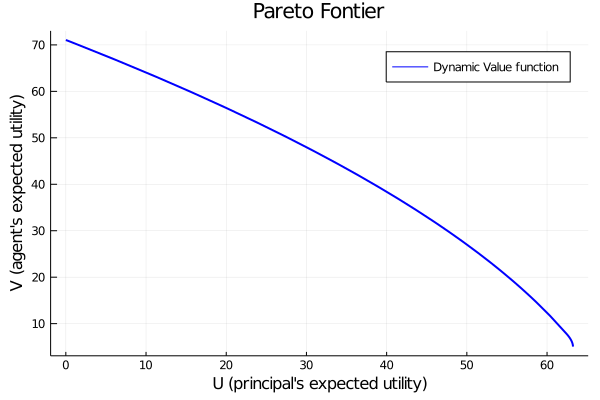

In [19]:
fig = plot(U[k_0:k_f],
    V[k_0:(k_f)],
    lw = 2,
    c = :blue,
    label="Dynamic Value function",
    legend=:topright,
    xlabel = " U (principal's expected utility) ",
    ylabel = " V (agent's expected utility) ",
    title = "Pareto Fontier")#

savefig("./reports/stationary_mo_frontier.pdf")
fig

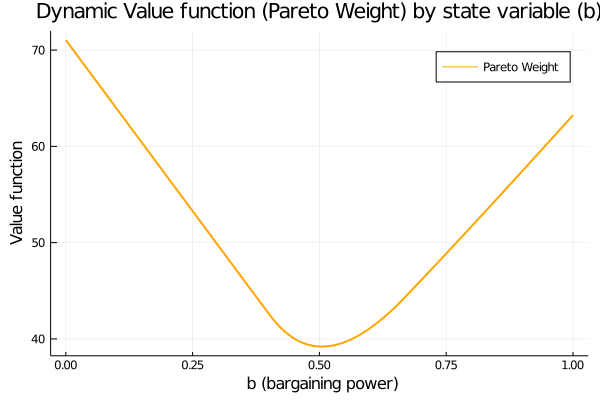

In [20]:
fig = plot(b[k_0:k_f],
    Value_function[k_0:(k_f)],
    lw = 2,
    c = :orange,
    label="Pareto Weight",
    legend=:topright,
    ylabel = " Value function ",
    xlabel = " b (bargaining power)",
    title = "Dynamic Value function (Pareto Weight) by state variable (b)")#

savefig("./reports/stationary_mo_value_function.pdf")
fig

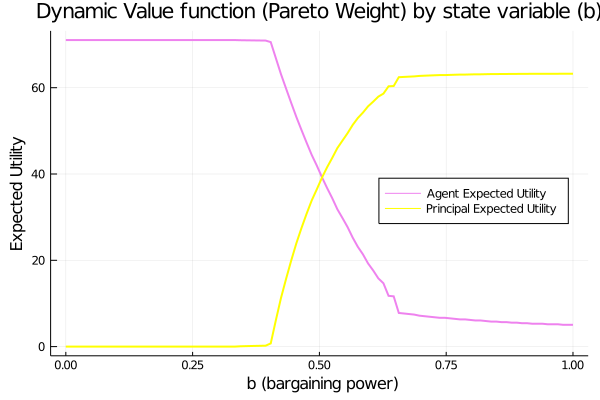

In [21]:
fig = plot(b[k_0:k_f],
    V[k_0:(k_f)],
    lw = 2,
    c = :violet,
    label="Agent Expected Utility",
    legend=(0.7, 0.5) ,
    ylabel = "Expected Utility",
    xlabel = " b (bargaining power)",
    title = "Dynamic Value function (Pareto Weight) by state variable (b)")#

plot!(b[k_0:k_f],
    U[k_0:(k_f)],
    lw = 2,
    c = :yellow,
    label="Principal Expected Utility")#



savefig("./reports/stationary_mo_u_v.pdf")
fig

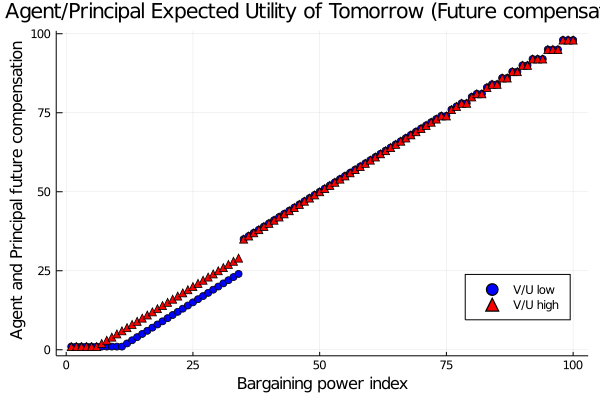

In [22]:
fig = scatter(Array([k_0:k_f]),
    V_l[k_0:k_f],
    c = :blue,
    label="V/U low",
    legend = :bottomright,
    ylabel = " Agent and Principal future compensation",
    xlabel = " Bargaining power index ",
    title = "Agent/Principal Expected Utility of Tomorrow (Future compensation)"
    )
fig = scatter!(Array([k_0:k_f]),
    V_h[k_0:k_f],
    c = :red,
    shape = :^,
    label="V/U high"
    )
savefig("./reports/stationary_mo_expected_utilities.pdf")
fig

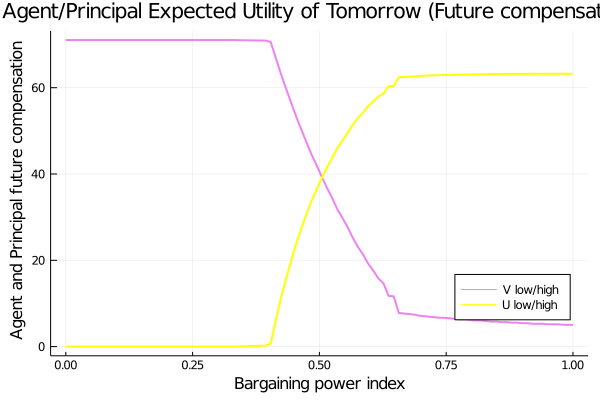

In [23]:
V_l_u = [V[Int(x)] for x = V_l[k_0:k_f]]
V_h_u = [V[Int(x)] for x = V_h[k_0:k_f]]

fig = plot(Array(b[k_0:k_f]),
    V_l_u[k_0:k_f],
    #markersize = 1,
    c = :violet,
    lw = 2,
    label="V low/high",
    legend = :bottomright,
    ylabel = " Agent and Principal future compensation",
    xlabel = " Bargaining power index ",
    title = "Agent/Principal Expected Utility of Tomorrow (Future compensation)"
    )


U_l_u = [U[Int(x)] for x = V_l[k_0:k_f]]
U_h_u = [U[Int(x)] for x = V_h[k_0:k_f]]

fig = plot!(Array(b[k_0:k_f]),
    U_l_u[k_0:k_f],
    #markersize = 1,
    c = :yellow,
    lw = 2,
    label="U low/high",
    legend = :bottomright,
    ylabel = " Agent and Principal future compensation",
    xlabel = " Bargaining power index ",
    title = "Agent/Principal Expected Utility of Tomorrow (Future compensation)"
    )

savefig("./reports/stationary_mo_expected_utilities_.pdf")
fig

savefig("./reports/stationary_mo_expected_utilities_.pdf")
fig

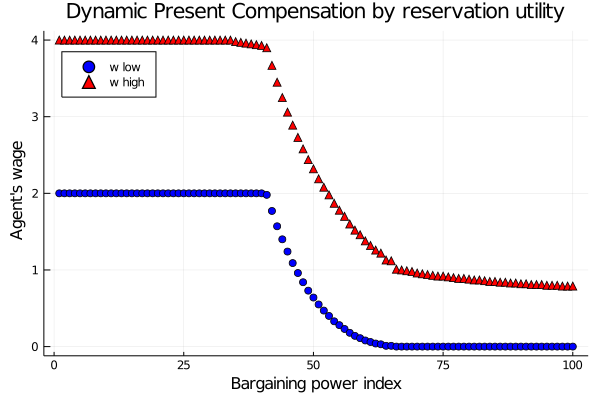

In [24]:
fig = scatter(Array([k_0:k_f]),
    w_l[k_0:k_f],
    c = :blue,
    label="w low",
    legend=:topleft,
    ylabel = " Agent's wage",
    xlabel = " Bargaining power index ",
    title = "Dynamic Present Compensation by reservation utility")

scatter!(Array([k_0:k_f]),
    w_h[k_0:k_f],
    c = :red,
    shape = :^,
    label="w high"
    )

# scatter!(Array([k_0, 50, k_f]),
#     [w_l[k_0], w_l[50], w_l[k_f]],
#     c = :violet,
#     label="w low"
#     )

# scatter!(Array([k_0, 50, k_f]),
#     [w_h[k_0], w_h[50], w_h[k_f]],
#     c = :green,
#     shape = :^,
#     label="w high"
#     )

savefig("./reports/stationary_mo_wages.pdf")
fig

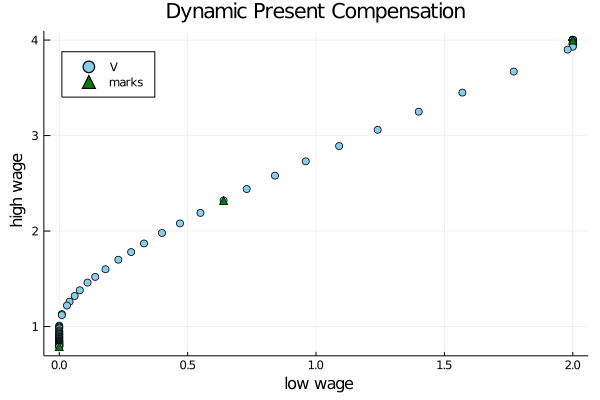

In [25]:
fig = scatter(
    w_l[k_0:k_f],
    w_h[k_0:k_f],
    c = :skyblue,
    label="V",
    legend=:topleft,
    ylabel = " high wage",
    xlabel = " low wage",
    title = "Dynamic Present Compensation")


scatter!([w_l[k_0], w_l[50], w_l[k_f]],
    [w_h[k_0], w_h[50], w_h[k_f]],
    c = :green,
    shape = :^,
    label="marks"
    )

savefig("./reports/stationary_mo_wagelow_high.pdf")
fig

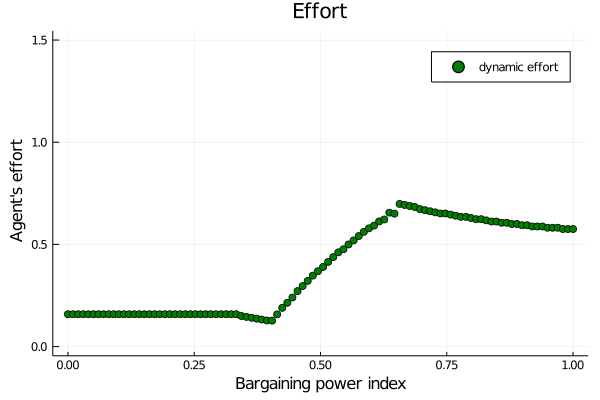

In [26]:

fig = scatter(b[k_0:k_f],
    a_opt[k_0:k_f],
    c = :green,
    label="dynamic effort",
    ylims=[0,1.5],
    ylabel = " Agent's effort",
    xlabel = " Bargaining power index ",
    title = "Effort")
savefig("./reports/stationary_mo_efforts.pdf")
fig

# Exporting values

In [19]:
df = DataFrame(u_princ = U, u_agent = V,w_l = w_l, w_h = w_h,u_l =U_l, u_h = U_h, a = a_opt)


,u_princ,u_agent,w_l,w_h,u_l,u_h,a
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,71.0413,2.0,4.0,1.0,1.0,0.158347
2,0.0,71.0413,2.0,4.0,1.0,1.0,0.158347
3,0.0,71.0413,2.0,4.0,1.0,1.0,0.158347
4,0.0,71.0413,2.0,4.0,1.0,1.0,0.158347
5,0.0,71.0413,2.0,4.0,1.0,1.0,0.158347
6,0.0,71.0413,2.0,4.0,1.0,1.0,0.158347
7,0.0,71.0413,2.0,4.0,1.0,2.0,0.158347
8,0.0,71.0413,2.0,4.0,1.0,3.0,0.158347
9,0.0,71.0413,2.0,4.0,1.0,4.0,0.158347


In [13]:
df[df.u_h.> 1, :]

,u_princ,u_agent,w_l,w_h,u_l,u_h,a
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,71.0413,2.0,4.0,1.0,2.0,0.158347
2,0.0,71.0413,2.0,4.0,1.0,3.0,0.158347
3,0.0,71.0413,2.0,4.0,1.0,4.0,0.158347
4,0.0,71.0413,2.0,4.0,1.0,5.0,0.158347
5,0.0,71.0413,2.0,4.0,1.0,6.0,0.158347
6,0.0,71.0413,2.0,4.0,2.0,7.0,0.158347
7,0.0,71.0413,2.0,4.0,3.0,8.0,0.158347
8,0.0,71.0413,2.0,4.0,4.0,9.0,0.158347
9,0.0,71.0413,2.0,4.0,5.0,10.0,0.158347


In [20]:

# write DataFrame out to CSV file
CSV.write("./data/stationary_mo_crra_0.5_100_step200.csv", df)

"./data/stationary_mo_crra_0.5_100_step200.csv"

In [8]:
sqrt(20)

4.47213595499958